In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_model = VGG16(weights = 'imagenet', include_top = True)
print(base_model)

In [3]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.output_shape)

0 input_1 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


In [37]:
model = models.Model(inputs = base_model.input, outputs = base_model.get_layer('block1_pool').output)

In [38]:
img_path = 'cat.jpg'
img = image.load_img(img_path, target_size = (224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

In [39]:
features = model.predict(x)
# print(features)

In [40]:
# from matplotlib import pyplot
# square = 23
# ix = 1
# fig, axes = plt.subplots(square, square, figsize = (22,22))
# for i in range(square):
#     for j in range(square):
#         if(ix >= 512):
#             continue
#         # specify subplot and turn of axis
#         else:
#             axes[i][j].set_xticks([])
#         axes[i][j].set_yticks([])
#         # plot filter channel in grayscale
#         axes[i][j].imshow(features[0, :, :, ix-1], cmap='gray')
#         ix += 1

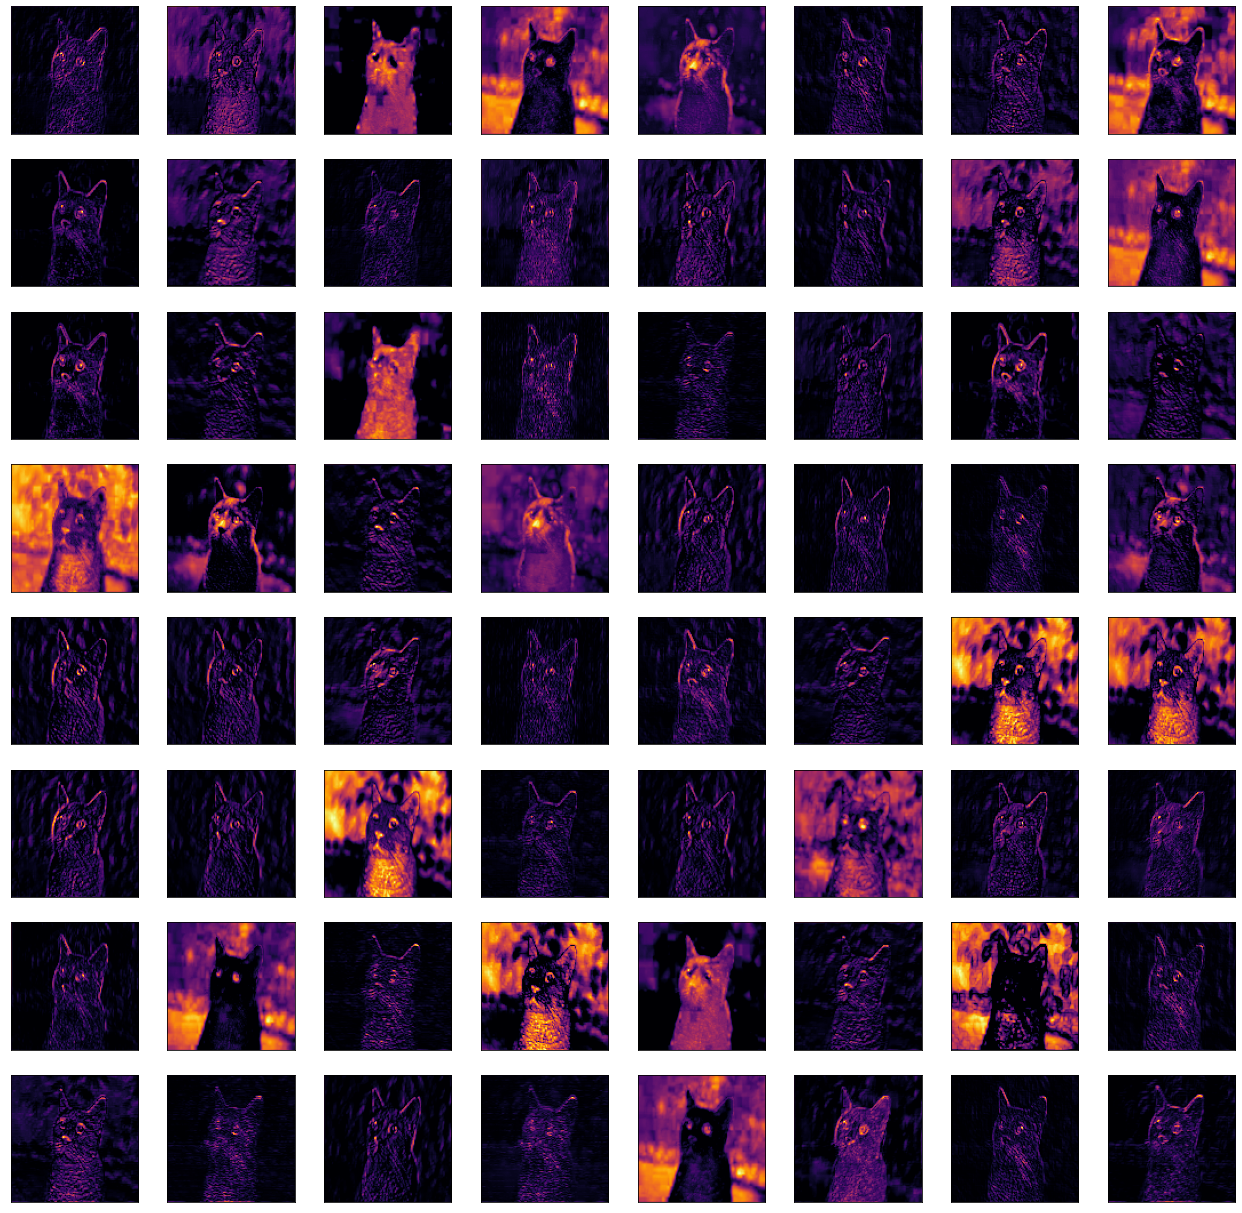

In [45]:
from matplotlib import pyplot
square = 8
ix = 1
fig, axes = plt.subplots(square, square, figsize = (22,22))
for i in range(square):
    for j in range(square):
        # specify subplot and turn of axis
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
        # plot filter channel in grayscale
        axes[i][j].imshow(features[0, :, :, ix-1], cmap='inferno')
        ix += 1

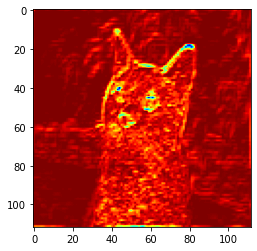

In [47]:
plt.imshow(features[0, :, :, 63], cmap='jet_r')